<a href="https://colab.research.google.com/github/Noahkandie/Week-12-IP-Advert-EDA/blob/main/Week_12_IP_core_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Defining the Question
## a) Specifying the Data Analytic Question

Identify which individuals are most likely to click on ads from a cryptography course website

## b) Defining the Metric for Success

For this sttudy, we will perform conclusive Exploratory Data Analysis to enable us identify individuals who are most likely to click on ads.
## c) Understanding the context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. Using the data previously collected, she is looking to do a study to identify which individuals are most likely to click on her ads.
## d) Data Relevance

Data is provided was collected in the past but from the same blog hence it is very suitable for this study.

Definition of Variables Daily Time Spent on Site

Age

Area

Income

Daily Internet Usage

Ad Topic Line

City

Male

Country

Timestamp

Clicked on Ad
### Drafting the Experimental Design
1. Define the question, set the metric for success, outline the context, drafting the experimental design, and determining the appropriateness of the data.
2. Load the dataset and previewing it.
3. Check for missing and duplicated values and deal with them where necessary.
4. Check for outliers and other anomalies and deal with them where necessary.
5. Perform univariate and bivariate analysis.
6. Create a baseline model and assess its accuracy score.
7. Challenge the solution.
8. Conclude and provide insights on how this project can be improved.

In [6]:
%load_ext rpy2.ipython

In [7]:
%%R
# importing and previewing the dataset
df<-read.csv('http://bit.ly/IPAdvertisingData')
head(df)

  Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage
1                    68.95  35    61833.90               256.09
2                    80.23  31    68441.85               193.77
3                    69.47  26    59785.94               236.50
4                    74.15  29    54806.18               245.89
5                    68.37  35    73889.99               225.58
6                    59.99  23    59761.56               226.74
                          Ad.Topic.Line           City Male    Country
1    Cloned 5thgeneration orchestration    Wrightburgh    0    Tunisia
2    Monitored national standardization      West Jodi    1      Nauru
3      Organic bottom-line service-desk       Davidton    0 San Marino
4 Triple-buffered reciprocal time-frame West Terrifurt    1      Italy
5         Robust logistical utilization   South Manuel    0    Iceland
6       Sharable client-driven software      Jamieberg    1     Norway
            Timestamp Clicked.on.Ad
1 2016-03-27 00:53:

In [10]:
%%R
#Data Dimensions
paste("The dimensions of the data frame are ", paste (dim(df), collapse = ','))


[1] "The dimensions of the data frame are  1000,10"


In [11]:
%%R
#Datatypes
sapply(df, class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"              "character"              "character" 
                    Male                  Country                Timestamp 
               "integer"              "character"              "character" 
           Clicked.on.Ad 
               "integer" 


In [12]:
%%R
#Summary
summary(df)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad.Topic.Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [20]:
%%R
#Checking for unique characters
sapply(df, function(x) length(unique(x))

RParsingError: ignored

In [18]:
%%R
# checking for duplicates
anyDuplicated(df)

[1] 0


In [21]:
%%R
# looking for missing values
colSums(is.na(df))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0 


In [22]:
%%R
#Checking for outliers
#First we select numeric columns excluding male and clicked.on.ad since they are binary column

df1 <- subset(df, select = -c(Ad.Topic.Line,City,	Male,	Country,	Timestamp,	Clicked.on.Ad))
head(df1)

  Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage
1                    68.95  35    61833.90               256.09
2                    80.23  31    68441.85               193.77
3                    69.47  26    59785.94               236.50
4                    74.15  29    54806.18               245.89
5                    68.37  35    73889.99               225.58
6                    59.99  23    59761.56               226.74


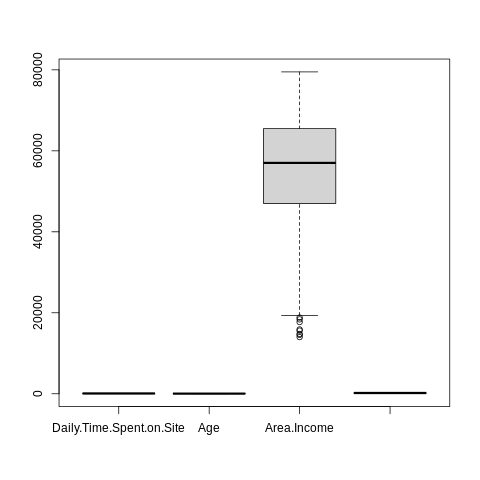

In [23]:
%%R
#Plotting boxplots to check for outliers
boxplot(df1
        )

In [24]:
%%R
boxplot.stats(df1$Area.Income)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57


We won't remove the above figures because it concerns income and people earn different amounts of money.


In [25]:
%%R
#Change datattypes
df$Male <- as.factor(df$Male)
df$Clicked.on.Ad <- as.factor(df$Clicked.on.Ad)
#Checking datatypes
sapply(df, class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
               "numeric"              "character"              "character" 
                    Male                  Country                Timestamp 
                "factor"              "character"              "character" 
           Clicked.on.Ad 
                "factor" 


In [26]:
%%R
# split timestamp column into year, month, day, and hour
# NB: minute and second are irrelevant to our analysis
df$year <- format(as.POSIXct(df$Timestamp, format="%Y-%m-%d %H:%M:%S"), "%Y")
df$month <- format(as.POSIXct(df$Timestamp, format="%Y-%m-%d %H:%M:%S"), "%m")
df$day <- format(as.POSIXct(df$Timestamp, format="%Y-%m-%d %H:%M:%S"), "%d")
df$hour <- format(as.POSIXct(df$Timestamp, format="%Y-%m-%d %H:%M:%S"), "%H")
head(df)

  Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage
1                    68.95  35    61833.90               256.09
2                    80.23  31    68441.85               193.77
3                    69.47  26    59785.94               236.50
4                    74.15  29    54806.18               245.89
5                    68.37  35    73889.99               225.58
6                    59.99  23    59761.56               226.74
                          Ad.Topic.Line           City Male    Country
1    Cloned 5thgeneration orchestration    Wrightburgh    0    Tunisia
2    Monitored national standardization      West Jodi    1      Nauru
3      Organic bottom-line service-desk       Davidton    0 San Marino
4 Triple-buffered reciprocal time-frame West Terrifurt    1      Italy
5         Robust logistical utilization   South Manuel    0    Iceland
6       Sharable client-driven software      Jamieberg    1     Norway
            Timestamp Clicked.on.Ad year month day hour

In [27]:
%%R
#Dropping the column Timestamp and Ad.Topic.Line
df_clean = subset(df, select = -c(Timestamp,Ad.Topic.Line))
head(df_clean)

  Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage           City
1                    68.95  35    61833.90               256.09    Wrightburgh
2                    80.23  31    68441.85               193.77      West Jodi
3                    69.47  26    59785.94               236.50       Davidton
4                    74.15  29    54806.18               245.89 West Terrifurt
5                    68.37  35    73889.99               225.58   South Manuel
6                    59.99  23    59761.56               226.74      Jamieberg
  Male    Country Clicked.on.Ad year month day hour
1    0    Tunisia             0 2016    03  27   00
2    1      Nauru             0 2016    04  04   01
3    0 San Marino             0 2016    03  13   20
4    1      Italy             0 2016    01  10   02
5    0    Iceland             0 2016    06  03   03
6    1     Norway             0 2016    05  19   14


In [28]:
%%R
#Datatypes
sapply(df_clean, class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage                     City                     Male 
               "numeric"              "character"                 "factor" 
                 Country            Clicked.on.Ad                     year 
             "character"                 "factor"              "character" 
                   month                      day                     hour 
             "character"              "character"              "character" 


In [29]:
%%R
# set the new columns to be of data type Factor
df_clean$year <- as.factor(df_clean$year)
df_clean$month <- as.factor(df_clean$month)
df_clean$day <- as.factor(df_clean$day)
df_clean$hour <- as.factor(df_clean$hour)

In [30]:
%%R
#Datatypes
sapply(df_clean, class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage                     City                     Male 
               "numeric"              "character"                 "factor" 
                 Country            Clicked.on.Ad                     year 
             "character"                 "factor"                 "factor" 
                   month                      day                     hour 
                "factor"                 "factor"                 "factor" 


# Exploratory Data Analysis

## Univariate Data Analysis

In [31]:
%%R
colnames(df_clean)

 [1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "City"                     "Male"                    
 [7] "Country"                  "Clicked.on.Ad"           
 [9] "year"                     "month"                   
[11] "day"                      "hour"                    


In [32]:
%%R
#Selecting the numeric columns
num <- subset(df_clean, select = -c(City,	Male,	Country,	Clicked.on.Ad, month,day,hour,year))
#Getting the measures of central tendency 
summary(num)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       


### Variance and Standard deviation

In [36]:
%%R

print(var(df_clean$Age))
sd(df_clean$Age)

[1] 77.18611
[1] 8.785562


In [37]:
%%R
print(var(df_clean$Area.Income))
sd(df_clean$Area.Income)

[1] 179952406
[1] 13414.63


In [38]:
%%R
print(var(df_clean$Daily.Internet.Usage))
sd(df_clean$Daily.Internet.Usage)

[1] 1927.415
[1] 43.90234


In [44]:
%%R
print(var(df_clean$Daily.Time.Spent.on.Site))
sd(df_clean$Daily.Time.Spent.on.Site)

[1] 251.3371
[1] 15.85361


#### Conclusions

1. The minimum amount of time spent on the blog is 32.60 and maximum is 91.43 with a mean at 65 and median at 68
2. The mean age of people visiting the site is 36, max age is 61 and min age is 19 which makes sense since the range between 61 and 19 are the people most active online.
3.From data, the maximum income of individuals is 79485 and a min income of 13996
4.The mean daily internet usage on the website is 180 and a median level at 183.1

In [45]:
%%R
install.packages("moments")
library(moments)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/moments_0.14.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 7650 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [47]:
%%R
#Checking for skewness
print(paste("Daily Time_Spent_Skewness: ", paste (skewness(df_clean$Daily.Time.Spent.on.Site), collapse = ','))) 
print(paste("Income_Skewness: ", paste (skewness(df_clean$Area.Income), collapse = ',')) )
print(paste("Age_Skewness: ", paste (skewness(df_clean$Age), collapse = ',')) )
paste("Daily_Internet_Usage_Skewness: ", paste (skewness(df_clean$Daily.Internet.Usage), collapse = ','))

[1] "Daily Time_Spent_Skewness:  -0.371202614867441"
[1] "Income_Skewness:  -0.649396701694076"
[1] "Age_Skewness:  0.478422676206608"
[1] "Daily_Internet_Usage_Skewness:  -0.0334870316434409"


In [48]:
%%R
#Checking for kurtosis
print(paste("Daily Time_Spent_Kurtosis: ", paste (kurtosis(df_clean$Daily.Time.Spent.on.Site), collapse = ',')) )
print(paste("Income_Kurtosis: ", paste (kurtosis(df_clean$Area.Income), collapse = ',')) )
print(paste("Age_Kurtosis: ", paste (kurtosis(df_clean$Age), collapse = ',')) )
paste("Daily_Internet_Usage_Kurtosis: ", paste (kurtosis(df_clean$Daily.Internet.Usage), collapse = ','))


[1] "Daily Time_Spent_Kurtosis:  1.90394215401081"
[1] "Income_Kurtosis:  2.89469406161926"
[1] "Age_Kurtosis:  2.59548176807726"
[1] "Daily_Internet_Usage_Kurtosis:  1.72770118094819"


Histograms

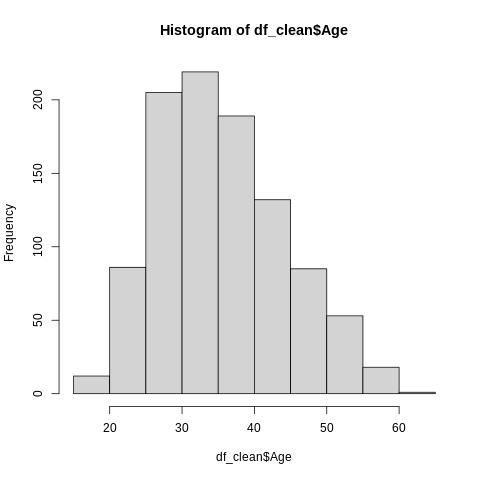

In [49]:
%%R
hist(df_clean$Age)

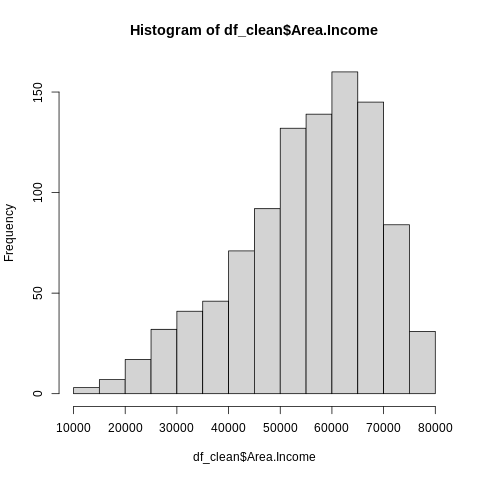

In [50]:
%%R
hist(df_clean$Area.Income)

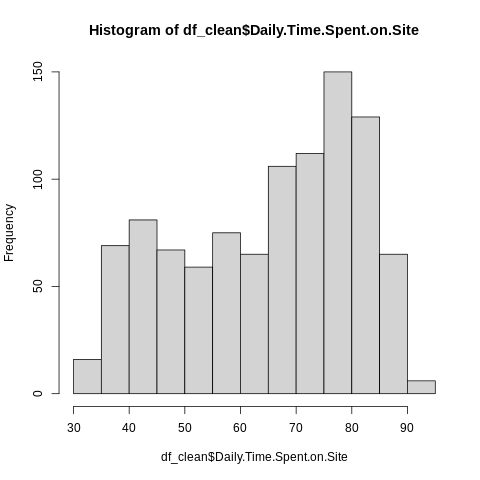

In [51]:
%%R
hist(df_clean$Daily.Time.Spent.on.Site)



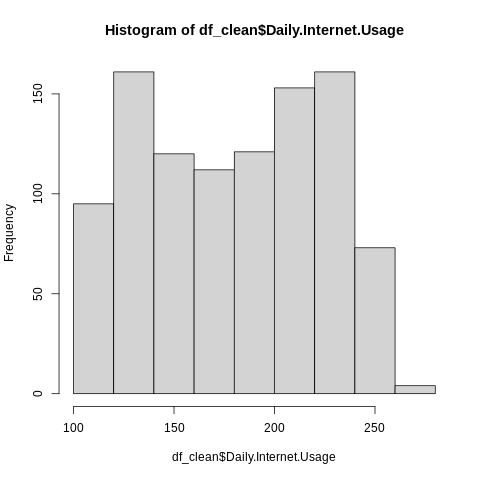

In [52]:
%%R
hist(df_clean$Daily.Internet.Usage)

Observation
-Age: Most people who visit the blog are between 25 and 40 years, data is skewed to the right of the mean. Graph doesn't show a sharp peak. The skewness value implies that the distribution is almost fairly symmetrical, so our initial assumption based on just looking at the visualization of the distribution is slightly wrong.

-Income: Data on income is mostly skewed to the right of the 55,00 mean. A kurtosis value of 2.89 indicates that the distribution is platykurtic although it is getting very close to being mesokurtic.The distribution is negatively skewed.

-Daily internet usage: The distribution is platykurtic. The distribution appears to be relatively uniform and bimodal.

-Time spent on site: There are lots of variations on how much time people spend on the site. A good number does spend between 65 and 85 time on the site.


In [53]:
%%R
install.packages("plyr")
library(plyr)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

In [54]:
%%R
### City

# displaying the first 6 frequently occurring cities
count_city <- count(df_clean$City)
count_city_head <- head(arrange(count_city, desc(freq)))
count_city_head

                x freq
1       Lisamouth    3
2    Williamsport    3
3 Benjaminchester    2
4       East John    2
5    East Timothy    2
6        Johnstad    2


In [55]:
%%R
### male

male_table <- table(df_clean$Male)
male_table


  0   1 
519 481 


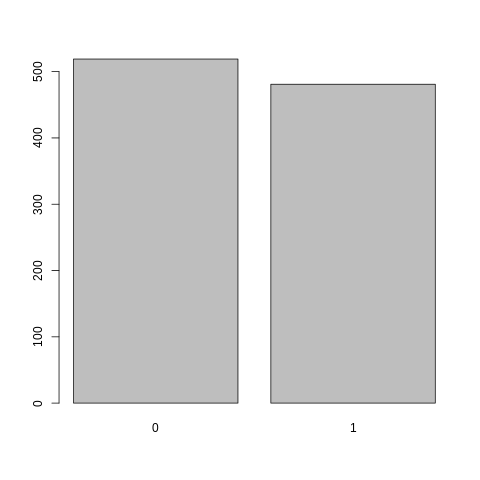

In [56]:
%%R
barplot(male_table)

In [57]:
%%R
### country 

# displaying the first 10 frequently occuring countries
count_country <- count(df_clean$Country)
count_country_head <- head(arrange(count_country, desc(freq)), 10)
count_country_head

                x freq
1  Czech Republic    9
2          France    9
3     Afghanistan    8
4       Australia    8
5          Cyprus    8
6          Greece    8
7         Liberia    8
8      Micronesia    8
9            Peru    8
10        Senegal    8


In [58]:
%%R
### month

# displaying the months in order of most frequently occurring to least frequently occurring
count_months <- count(df_clean$month)
arrange(count_months, desc(freq))

   x freq
1 02  160
2 03  156
3 01  147
4 04  147
5 05  147
6 06  142
7 07  101


We see here that February is the most frequently occurring month with July being the least frequently occurring month. 


In [60]:
%%R
### day

# displaying top 5 frequently occurring days
count_days <- count(df_clean$day)
head(arrange(count_days, desc(freq)), 5)

   x freq
1 03   46
2 17   42
3 15   41
4 10   37
5 04   36


In [61]:
%%R
tail(arrange(count_days, desc(freq)),5)

    x freq
27 02   25
28 06   25
29 22   24
30 25   23
31 31   18


The 3rd day is the most frequently occurring day overall. However, to get a more accurate picture of this, we will look at which day occurs most frequently in which month. We will do this in bivariate analysis.
The 31st day seems to be the least occurring day.

In [63]:
%%R
### hour
# displaying the top 5 hours
count_hours <- count(df_clean$hour)
head(arrange(count_hours, desc(freq)), 5)



   x freq
1 07   54
2 20   50
3 09   49
4 21   48
5 00   45


In [64]:
%%R
tail(arrange(count_hours, desc(freq)), 5)

    x freq
20 12   38
21 02   36
22 15   35
23 01   32
24 10   31


Most frequently occurring time appears to be around 7 AM. Least frequently occurring time appears to be around 10 AM. This is probably because more people get engrossed in the day's work.


In [65]:
%%R
### clicked on ad

ad_table <- table(df_clean$Clicked.on.Ad)
print(ad_table)


  0   1 
500 500 


Looks like the number of people who both clicked on the ad and didn't click on the ad is the same (500 each).

### Bivariate analysis
We will start by looking at the relationship between our target variable (clicked_on_ad) and the other variables.


In [66]:
%%R
# how many males clicked on ads
ad_male.table <- table(df_clean$Clicked.on.Ad, df_clean$Male)
names(dimnames(ad_male.table)) <- c("Clicked on Ad?", "Male?")
ad_male.table

              Male?
Clicked on Ad?   0   1
             0 250 250
             1 269 231


From this we see that of those who clicked on the ad, 269 were female while 231 were male. There was no difference in gender of those who did not click on the ad.


In [67]:
%%R
install.packages("ggplot2")
library(ggplot2)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3063309 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

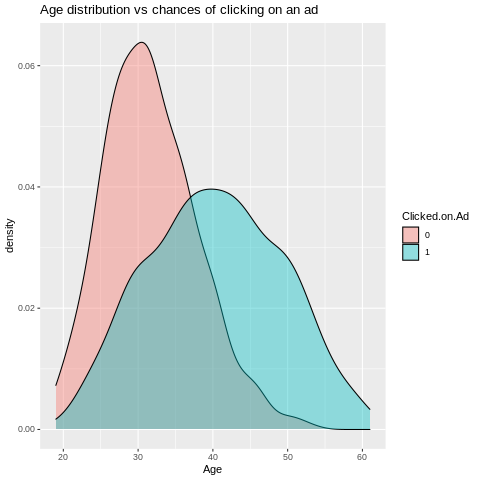

In [68]:
%%R
#Age and it's relationship to clicking an ad
ggplot(df_clean, 
       aes(x = Age, 
           fill = Clicked.on.Ad)) +
  geom_density(alpha = 0.4) +
  labs(title = "Age distribution vs chances of clicking on an ad")

People from all age groups click on ads on the site. People above 40 are more likely to click on an ad as per the graph above.
while younger people dont click as often

In [70]:
%%R
# ad clicked per month
ad_month.table <- table(df_clean$month, df_clean$Clicked.on.Ad)
names(dimnames(ad_month.table)) <- c("Month", "Clicked on Ad?")
ad_month.table

     Clicked on Ad?
Month  0  1
   01 78 69
   02 77 83
   03 82 74
   04 73 74
   05 68 79
   06 71 71
   07 51 50


Looking at this table, we see that February reports the highest number of ads clicked and July the least.


In [71]:
%%R
# ad clicked per day
ad_day.table <- table(df_clean$day, df_clean$Clicked.on.Ad)
names(dimnames(ad_day.table)) <- c("Day", "Clicked on Ad?")
ad_day.table

    Clicked on Ad?
Day   0  1
  01 14 19
  02 15 10
  03 20 26
  04 22 14
  05 17 18
  06 11 14
  07 18 14
  08 20 15
  09 14 20
  10 18 19
  11 17 15
  12  9 20
  13 13 17
  14 12 21
  15 21 20
  16 21 14
  17 24 18
  18 18 17
  19 17 12
  20 22 11
  21 17 15
  22 14 10
  23 13 22
  24 15 18
  25  8 15
  26 21 15
  27 19 16
  28 13 17
  29 14 15
  30 14 14
  31  9  9


Day 03 has the highest number of ads clicked. Day 31 has the least.


In [72]:
%%R
# ad clicked per hour
ad_hour.table <- table(df_clean$hour, df_clean$Clicked.on.Ad)
names(dimnames(ad_hour.table)) <- c("Hour", "Clicked on Ad?")
ad_hour.table

    Clicked on Ad?
Hour  0  1
  00 19 26
  01 16 16
  02 19 17
  03 19 23
  04 21 21
  05 23 21
  06 16 23
  07 28 26
  08 22 21
  09 21 28
  10 17 14
  11 16 24
  12 22 16
  13 21 21
  14 22 21
  15 16 19
  16 23 16
  17 18 23
  18 16 25
  19 20 19
  20 26 24
  21 29 19
  22 24 19
  23 26 18


Hour 09 (9 AM) returned the highest number of ads clicked, 28, whereas Hour 10 (10 AM) returned the lowest, 14.


In [73]:
%%R
# ad clicked per city
ad_city.table <- table(df_clean$City, df_clean$Clicked.on.Ad)
names(dimnames(ad_city.table)) <- c("City", "Clicked on Ad?")
ad_city.table

                         Clicked on Ad?
City                      0 1
  Adamsbury               0 1
  Adamside                0 1
  Adamsstad               1 0
  Alanview                1 0
  Alexanderfurt           0 1
  Alexanderview           0 1
  Alexandrafort           1 0
  Alexisland              1 0
  Aliciatown              0 1
  Alvaradoport            0 1
  Alvarezland             0 1
  Amandafort              0 1
  Amandahaven             0 1
  Amandaland              1 0
  Amyfurt                 1 0
  Amyhaven                1 0
  Andersonchester         0 1
  Andersonfurt            0 1
  Andersonton             1 0
  Andrewborough           0 1
  Andrewmouth             1 0
  Angelhaven              1 0
  Anthonyfurt             1 0
  Ashleychester           1 0
  Ashleymouth             1 0
  Austinborough           1 0
  Austinland              1 0
  Bakerhaven              1 0
  Barbershire             1 0
  Beckton                 1 0
  Benjaminchester         2 0


###Improving the solution: 
creating a function that returns the highest and lowest values of a specific column so that you do not have to manually go through each individual record.


In [74]:
%%R
install.packages("corrplot")
library(corrplot)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.90.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2820127 bytes (2.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

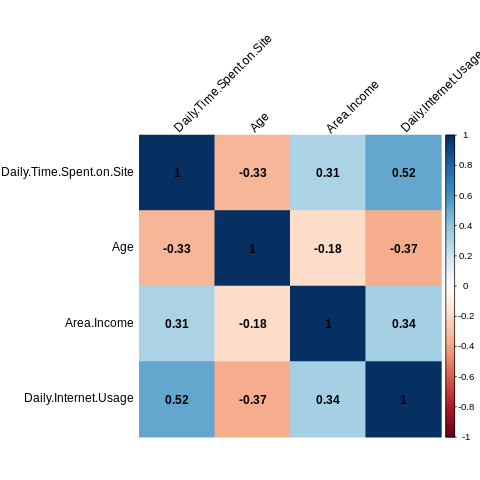

In [75]:
%%R
#Get the correlation matrix
res = cor(num)
#Plotting a correlation plot
corrplot(res, method="color",addCoef.col = "black", 
         tl.col="black", tl.srt=45)

There is a fare correlation between amount spent on site and the Daily internet usage.


#### Scatter Plot

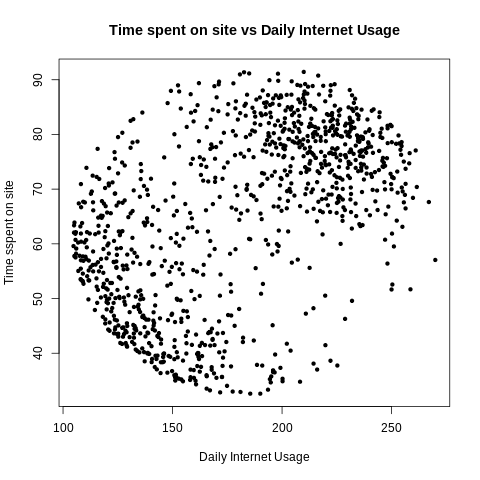

In [76]:
%%R
x <-df_clean$Daily.Internet.Usage
y <-  df_clean$Daily.Time.Spent.on.Site
# Plot with main and axis titles
# Change point shape (pch = 19) and remove frame.
plot(x, y, main = "Time spent on site vs Daily Internet Usage",
     xlab = "Daily Internet Usage", ylab = "Time sspent on site",
     pch = 20)

The points are all over but our data points are not highly correlated which explains this. But we can see that people who spend less time on site use less internet. Also, most of the people who use alot of internet per day seem to spend a considerable amount of time on the site.


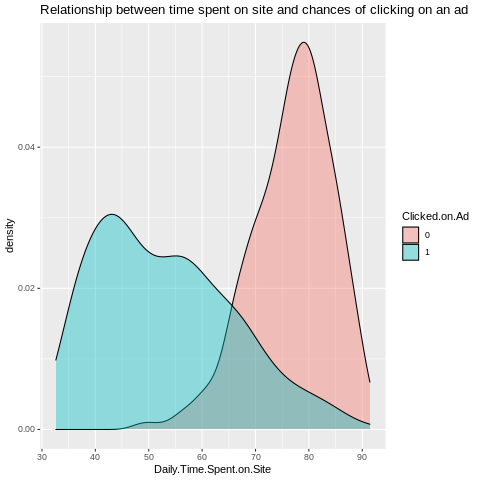

In [77]:
%%R
#Time Spent on internet and it's relationship to clicking an ad
ggplot(df_clean, 
       aes(x = Daily.Time.Spent.on.Site, 
           fill = Clicked.on.Ad)) +
  geom_density(alpha = 0.4) +
  labs(title = "Relationship between time spent on site and chances of clicking on an ad")


People who spend less time on the site are likely to click on an ad as compared to those who spend alot of time on the site.


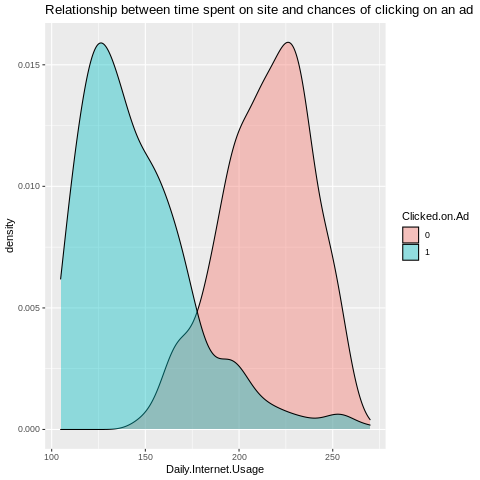

In [78]:
%%R
#Internet Usage and it's relationship to clicking an ad
ggplot(df_clean, 
       aes(x = Daily.Internet.Usage, 
           fill = Clicked.on.Ad)) +
  geom_density(alpha = 0.4) +
  labs(title = "Relationship between time spent on site and chances of clicking on an ad")


It seems the longer people spend on the internet, the likelier they are to click on the ads.


## Conclusion

i) People who have a daily internet usage of less than 175 are more likely to click on an ad
ii) People who spend less than 70mins on the site are likely to click on ad
iii) People above 40 are more likely to click on an ad
iv) People with an income of less than 60000 are most likely to click on an ad

## Challenging the solution

i) It would be great to do some hypothesis testing on the conclusions made from Exploratory Data Analysis, this way we could ascertain the chances of specific person clicking on an ad or not.
ii) Also, it would be necessary to create a predictive model and perform some feature importance selection to choose which variables are most important to use when deciding who will click on an ad or not when using the website.
